# Lending Club Case Study

In [12]:
#Importing library
import pandas as pd

In [15]:
#Reading the input dataset
#Low memory= false is used here since the dataset contains multiple columns having data of different types
ds = pd.read_csv('loan.csv', low_memory=False)

In [16]:
ds.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


_The dataset contains 111 columns_

## Cleaning the data

__The data that is not relevant for this analysis is removed from the file__

In [18]:
ds = pd.read_csv('loan.csv', low_memory=False)
ds.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16


The data has be cleaned by removing the unnecessary columns from the file. We are left with 45 columns.

__Finding the number of missing data in each column__

In [20]:
print(ds.isnull().sum())

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

_There seems to be clear gap for some of these columns. For eg, columns like mths_since_last_record having more than 30,000 records as blank wouldn't be providing us with any useful info_

__Removing columns with high number of blanks__

In [23]:
ds = ds.drop(ds.columns[ds.isnull().sum() > 20000], axis=1)
print(ds.isnull().sum())

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prnc

__Some of the columns have values with differnt decimal levels. These will be rounded off.__

In [26]:
ds['total_pymnt']

0         5863.155187
1         1008.710000
2         3005.666844
3        12231.890000
4         3513.330000
             ...     
39712     2822.969293
39713     9913.491822
39714     5272.161128
39715     5174.198551
39716     9195.263334
Name: total_pymnt, Length: 39717, dtype: float64

In [27]:
columns_to_roundoff = ['total_pymnt', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']

In [29]:
ds[columns_to_roundoff] = ds[columns_to_roundoff].round(2)

In [30]:
ds['total_pymnt']

0         5863.16
1         1008.71
2         3005.67
3        12231.89
4         3513.33
           ...   
39712     2822.97
39713     9913.49
39714     5272.16
39715     5174.20
39716     9195.26
Name: total_pymnt, Length: 39717, dtype: float64

In [31]:
ds['total_rec_late_fee']

0         0.00
1         0.00
2         0.00
3        16.97
4         0.00
         ...  
39712     0.00
39713     0.00
39714     0.00
39715     0.00
39716     0.00
Name: total_rec_late_fee, Length: 39717, dtype: float64

_The rounding off process is also complete_

In [32]:
ds

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07


In [34]:
#Removing duplicates if there are any
ds = ds.drop_duplicates()

In [35]:
ds

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07


## Univariant Analysis

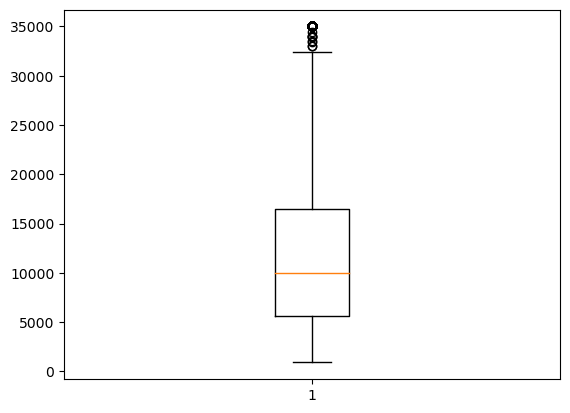

In [54]:
import matplotlib.pyplot as plt
filtered_ds = ds[ds['loan_status'] == 'Charged Off']
plt.boxplot(filtered_ds['loan_amnt'])
plt.show()

In [57]:
#Box plot for each loan status corresponding to one of the 3 values
charged_off_ds = ds[ds['loan_status'] == 'Charged Off']
fully_paid_ds = ds[ds['loan_status'] == 'Fully Paid']
current_ds = ds[ds['loan_status'] == 'Current']

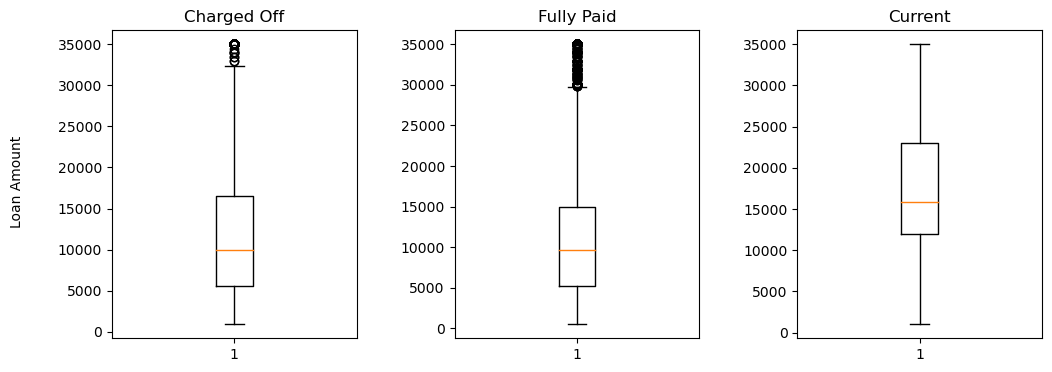

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].boxplot(charged_off_ds['loan_amnt'])
axs[1].boxplot(fully_paid_ds['loan_amnt'])
axs[2].boxplot(current_ds['loan_amnt'])

axs[0].set_title('Charged Off')
axs[1].set_title('Fully Paid')
axs[2].set_title('Current')

fig.text(0.04, 0.5, 'Loan Amount', va='center', rotation='vertical')
plt.subplots_adjust(wspace=0.4)
plt.show()

_This plot shows the variation corresponding to the loan amount the person takes and the chances for it to get defaulted_

## Bivariant Analysis

C:\Users\Deepak\AppData\Local\Temp\ipykernel_1588\1650079255.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



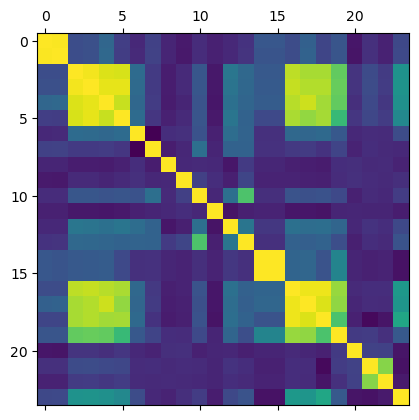

In [61]:
#Correlation matrix
plt.matshow(ds.corr())
plt.show()

In [65]:
loan_status_col = 'loan_status'
potential_factors = ['int_rate', 'loan_amnt', 'emp_length', 'home_ownership', 'annual_inc', 'purpose']

In [67]:
correlation_matrix = ds[potential_factors].corr()
print(correlation_matrix)

            loan_amnt  annual_inc
loan_amnt    1.000000    0.271149
annual_inc   0.271149    1.000000


C:\Users\Deepak\AppData\Local\Temp\ipykernel_1588\1084070332.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [71]:
#only checking for categorical variables
potential_factors = ['int_rate', 'emp_length', 'home_ownership', 'purpose']

In [72]:
#only checking for categorical variables
for factor in potential_factors:
    print(f"Analysis for '{factor}':")
    
    if ds[factor].dtype == 'object':
        # Categorical variable analysis using groupby and size
        contingency_table = ds.groupby([loan_status_col, factor]).size().unstack()
        print(contingency_table)
        print()
    else:
        # Continuous variable analysis using correlation coefficient
        correlation_coefficient = ds[[factor, loan_status_col]].corr().iloc[0, 1]
        print(f"Correlation coefficient: {correlation_coefficient}")
        print()

Analysis for 'int_rate':
int_rate     10.00%  10.01%  10.08%  10.14%  10.20%  10.25%  10.28%  10.33%  \
loan_status                                                                   
Charged Off    31.0     1.0     7.0     1.0     3.0    22.0     3.0     1.0   
Current         2.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Fully Paid    218.0     6.0    41.0     9.0    15.0   196.0    18.0     8.0   

int_rate     10.36%  10.37%  ...  9.63%  9.64%  9.67%  9.70%  9.76%  9.83%  \
loan_status                  ...                                             
Charged Off    32.0    51.0  ...   40.0    4.0    NaN    NaN   11.0    NaN   
Current         NaN     1.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
Fully Paid    218.0   416.0  ...  338.0   14.0    7.0    8.0   54.0    8.0   

int_rate     9.88%  9.91%  9.96%  9.99%  
loan_status                              
Charged Off    9.0   35.0    2.0   58.0  
Current        NaN   20.0    NaN   13.0  
Fully Paid   172.0  